# Feature Selection Techniques in Python

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

Irrelevant or partially relevant features can negatively impact model performance.

In this tutorial you will discover automatic feature selection techniques that you can use to prepare your machine learning data in python with scikit-learn.


This section lists 4 feature selection recipes for machine learning in Python

This post contains recipes for feature selection methods.

Recipes uses the Pima Indians onset of diabetes dataset to demonstrate the feature selection method . This is a binary classification problem where all of the attributes are numeric.

In [1]:
# Importing all the necessary libraries 
import numpy as np
import pandas as pd

# 1. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

Many different statistical test scan be used with this selection method. For example the ANOVA F-value method is appropriate for numerical inputs and categorical data, as we see in the Pima dataset. This can be used via the f_classif() function. We will select the 4 best features using this method in the example below.

In [2]:
#Feature Selection with univariate statistical tests
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest,f_classif
names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
filename=pd.read_csv('pima-indians-diabetes.csv',names=names)
array=filename.values
X=array[:,0:8]
y=array[:,8]
# Feature Extraction
test=SelectKBest(score_func=f_classif,k=4)
fit=test.fit(X,y)
set_printoptions(precision=3)
print(fit.scores_)
print()
features=fit.transform(X)
# summarize selected Features
print(features[0:5,:])

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores). Specifically features with indexes 0 (preq), 1 (plas), 5 (mass), and 7 (age).

# 2. Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the RFE class in the scikit-learn documentation.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [3]:
# Feature extraction with RFE
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
dataframe=pd.read_csv('pima-indians-diabetes.csv',names=names)
array=dataframe.values
X=array[:,0:8]
y=array[:,8]
# feature extraction
model=LogisticRegression(solver='lbfgs')
rfe=RFE(model,3)
fit=rfe.fit(X,y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
dataframe.head()

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


You can see that RFE chose the the top 3 features as preg, mass and pedi.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

These are marked True in the support_ array and marked with a choice “1” in the ranking_ array.

# 3. Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

In [4]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
dataframe=pd.read_csv('pima-indians-diabetes.csv',names=names)
array=dataframe.values
X=array[:,0:8]
y=array[:,8]
# feature extraction
pca=PCA(n_components=3)
fit=pca.fit(X,y)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print()
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]

[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

You can see that the transformed dataset (3 principal components) bare little resemblance to the source data.

# 4. Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset

In [5]:
# Feature Importance with ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
pima_dataset=pd.read_csv('pima-indians-diabetes.csv',names=names)
X=pima_dataset.iloc[:,0:8]
y=pima_dataset.iloc[:,8]
model=ExtraTreesClassifier(n_estimators=10)
model.fit(X,y)
print("Feature Importance :",model.feature_importances_)
X.head()

Feature Importance : [0.118 0.24  0.097 0.079 0.08  0.139 0.121 0.125]


,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

You can see that we are given an importance score for each attribute where the larger score the more important the attribute. The scores suggest at the importance of plas, age and mass

# How to Choose a Feature Selection Method For Machine Learning

Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.

As such, it can be challenging for a machine learning practitioner to select an appropriate statistical measure for a dataset when performing filter-based feature selection.

In this post, you will discover how to choose statistical measures for filter-based feature selection with numerical and categorical data.

After reading this tutorial, you will know:

There are two main types of feature selection techniques: supervised and unsupervised, and supervised methods may be divided into wrapper, filter and intrinsic.

Filter-based feature selection methods use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features.

Statistical measures for feature selection must be carefully chosen based on the data type of the input variable and the output or response variable.


This tutorial is divided into 4 parts; they are:

Feature Selection Methods

Statistics for Filter Feature Selection Methods

1. Numerical Input, Numerical Output

2. Numerical Input, Categorical Output

3. Categorical Input, Numerical Output

4. Categorical Input, Categorical Output

Tips and Tricks for Feature Selection

1. Correlation Statistics

2. Selection Method

3. Transform Variables

What Is the Best Method?

Worked Examples

1. Regression Feature Selection

2. Classification Feature Selection


1. Feature Selection Methods

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

Feature selection is primarily focused on removing non-informative or redundant predictors from the model.


Some predictive modeling problems have a large number of variables that can slow the development and training of models and require a large amount of system memory. Additionally, the performance of some models can degrade when including input variables that are not relevant to the target variable.

Many models, especially those based on regression slopes and intercepts, will estimate parameters for every term in the model. Because of this, the presence of non-informative variables can add uncertainty to the predictions and reduce the overall effectiveness of the model.


One way to think about feature selection methods are in terms of supervised and unsupervised methods.

An important distinction to be made in feature selection is that of supervised and unsupervised methods. When the outcome is ignored during the elimination of predictors, the technique is unsupervised.



The difference has to do with whether features are selected based on the target variable or not. Unsupervised feature selection techniques ignores the target variable, such as methods that remove redundant variables using correlation. Supervised feature selection techniques use the target variable, such as methods that remove irrelevant variables..

Another way to consider the mechanism used to select features which may be divided into wrapper and filter methods. These methods are almost always supervised and are evaluated based on the performance of a resulting model on a hold out dataset.

Wrapper feature selection methods create many models with different subsets of input features and select those features that result in the best performing model according to a performance metric. These methods are unconcerned with the variable types, although they can be computationally expensive. RFE is a good example of a wrapper feature selection method.

Wrapper methods evaluate multiple models using procedures that add and/or remove predictors to find the optimal combination that maximizes model performance.


Filter feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model.

Filter methods evaluate the relevance of the predictors outside of the predictive models and subsequently model only the predictors that pass some criterion.


Finally, there are some machine learning algorithms that perform feature selection automatically as part of learning the model. We might refer to these techniques as intrinsic feature selection methods.

… some models contain built-in feature selection, meaning that the model will only include predictors that help maximize accuracy. In these cases, the model can pick and choose which representation of the data is best.



This includes algorithms such as penalized regression models like Lasso and decision trees, including ensembles of decision trees like random forest.

Some models are naturally resistant to non-informative predictors. Tree- and rule-based models, MARS and the lasso, for example, intrinsically conduct feature selection.



Feature selection is also related to dimensionally reduction techniques in that both methods seek fewer input variables to a predictive model. The difference is that feature selection select features to keep or remove from the dataset, whereas dimensionality reduction create a projection of the data resulting in entirely new input features. As such, dimensionality reduction is an alternate to feature selection rather than a type of feature selection.



We can summarize feature selection as follows.

Feature Selection: Select a subset of input features from the dataset.

Unsupervised: Do not use the target variable (e.g. remove redundant variables).
Correlation

Supervised: Use the target variable (e.g. remove irrelevant variables).

Wrapper: Search for well-performing subsets of features.
RFE

Filter: Select subsets of features based on their relationship with the target.

Statistical Methods

Feature Importance Methods

Intrinsic: Algorithms that perform automatic feature selection during training.
Decision Trees

Dimensionality Reduction: Project input data into a lower-dimensional feature space

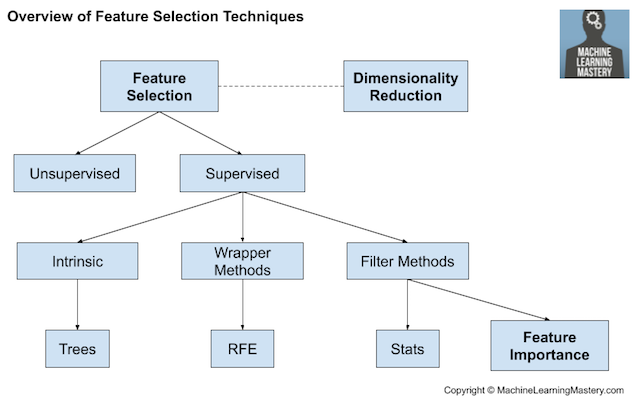

In [6]:
from IPython.display import Image

Image('Feature_Selection.png')

2. Statistics for Filter-Based Feature Selection Methods

It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection.

As such, the choice of statistical measures is highly dependent upon the variable data types.

Common data types include numerical (such as height) and categorical (such as a label), although each may be further subdivided such as integer and floating point for numerical variables, and boolean, ordinal, or nominal for categorical variables.

Common input variable data types:

Numerical Variables

1. Integer Variables.

2. Floating Point Variables.

Categorical Variables.

1. Boolean Variables (dichotomous).

2. Ordinal Variables.

3. Nominal Variables

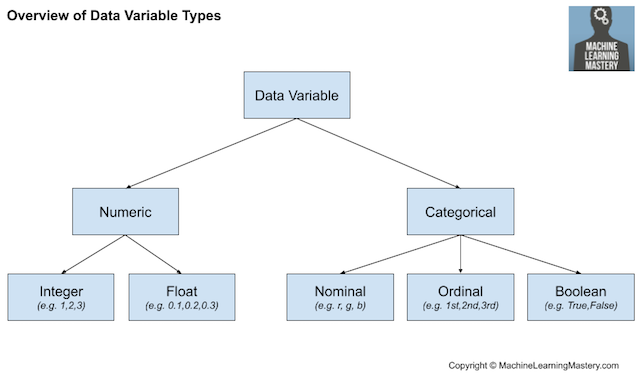

In [7]:
from IPython.display import Image

Image('Overview-of-Data-Variable-Types2.png')

The more that is known about the data type of a variable, the easier it is to choose an appropriate statistical measure for a filter-based feature selection method.

In this section, we will consider two broad categories of variable types: numerical and categorical; also, the two main groups of variables to consider: input and output.

Input variables are those that are provided as input to a model. In feature selection, it is this group of variables that we wish to reduce in size. Output variables are those for which a model is intended to predict, often called the response variable.

The type of response variable typically indicates the type of predictive modeling problem being performed. For example, a numerical output variable indicates a regression predictive modeling problem, and a categorical output variable indicates a classification predictive modeling problem.

Numerical Output: Regression predictive modeling problem.

Categorical Output: Classification predictive modeling problem.

The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as univariate statistical measures. This may mean that any interaction between input variables is not considered in the filtering process.

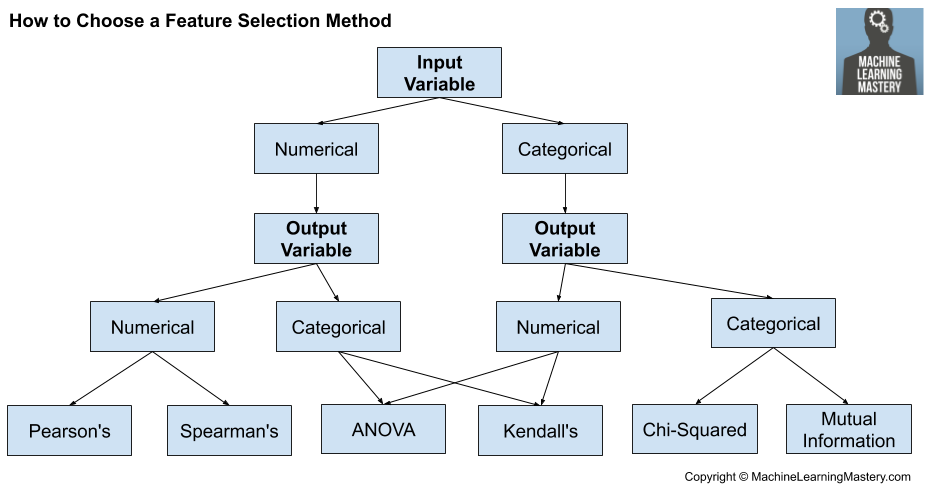

In [8]:
from IPython.display import Image

Image('FM.png')

Numerical Input, Numerical Output

This is a regression predictive modeling problem with numerical input variables.

The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation.

Pearson’s correlation coefficient (linear).
Spearman’s rank coefficient (nonlinear)


Numerical Input, Categorical Output
This is a classification predictive modeling problem with numerical input variables.

This might be the most common example of a classification problem,

Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.

ANOVA correlation coefficient (linear).
Kendall’s rank coefficient (nonlinear).
Kendall does assume that the categorical variable is ordinal.

Categorical Input, Numerical Output
This is a regression predictive modeling problem with categorical input variables.

This is a strange example of a regression problem (e.g. you would not encounter it often).

Nevertheless, you can use the same “Numerical Input, Categorical Output” methods (described above), but in reverse.

Categorical Input, Categorical Output
This is a classification predictive modeling problem with categorical input variables.

The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.

Chi-Squared test (contingency tables).
Mutual Information.
In fact, mutual information is a powerful method that may prove useful for both categorical and numerical data, e.g. it is agnostic to the data types.


3. Tips and Tricks for Feature Selection

This section provides some additional considerations when using filter-based feature selection.

Correlation Statistics
The scikit-learn library provides an implementation of most of the useful statistical measures.

For example:

Pearson’s Correlation Coefficient: f_regression()
ANOVA: f_classif()
Chi-Squared: chi2()
Mutual Information: mutual_info_classif() and mutual_info_regression()
Also, the SciPy library provides an implementation of many more statistics, such as Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).

Selection Method
The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.

Two of the more popular methods include:

Select the top k variables: SelectKBest
Select the top percentile variables: SelectPercentile
I often use SelectKBest myself.

Transform Variables
Consider transforming the variables in order to access different statistical methods.

For example, you can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out.

You can also make a numerical variable discrete (e.g. bins); try categorical-based measures.

Some statistical measures assume properties of the variables, such as Pearson’s that assumes a Gaussian probability distribution to the observations and a linear relationship. You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.

What Is the Best Method?
There is no best feature selection method.

Just like there is no best set of input variables or best machine learning algorithm. At least not universally.

Instead, you must discover what works best for your specific problem using careful systematic experimentation.

Try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.

4. Worked Examples of Feature Selection

Regression Feature Selection:
(Numerical Input, Numerical Output)

This section demonstrates feature selection for a regression problem that as numerical inputs and numerical outputs.

A test regression problem is prepared using the make_regression() function.

Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

In [9]:
# Feature Selection for numerical input and Numeric Output and we will choose Pearson correlation 

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
print(fs.scores_)

(100, 10)
[3.876e-01 7.612e-01 3.476e-01 7.376e-01 2.218e+00 8.205e+00 6.410e-01
 1.770e-03 8.119e-01 3.920e+00 6.022e-01 2.740e-01 1.187e+00 3.112e+00
 2.858e-01 2.358e+00 5.390e-01 6.619e-01 2.798e-01 5.646e-01 1.329e-01
 7.215e-02 2.394e+00 9.913e-03 4.635e-01 5.647e-01 5.440e-01 7.037e-01
 2.109e+01 1.791e+00 1.899e+00 1.079e-01 4.513e-02 8.626e-01 6.095e+00
 1.932e-02 1.187e+00 6.614e-02 4.137e-01 6.241e+00 8.352e-01 1.167e+01
 1.383e-01 3.665e-01 3.466e-02 1.694e+00 1.394e-01 4.363e-01 3.049e-01
 3.423e-02 7.241e-02 8.625e-01 6.026e-01 1.802e+00 1.140e+01 3.943e-04
 3.763e+00 1.256e+00 5.132e+00 2.361e+01 8.300e-02 1.067e+00 2.435e+01
 2.088e+00 1.346e+01 3.709e-01 9.000e+00 1.047e-01 1.607e-02 4.677e-01
 4.514e-03 7.992e-02 4.677e-01 2.117e+00 7.605e-02 6.041e-01 9.079e-01
 1.512e-01 5.601e-01 8.773e-01 2.256e+00 1.967e+00 3.933e-02 1.191e+00
 1.839e-01 1.361e-03 1.901e-01 1.740e+00 2.322e-01 6.562e-01 6.924e-01
 1.455e-01 1.229e-01 6.012e-02 2.062e+00 1.498e+00 2.788e+00 2.729e

Classification Feature Selection:
    
(Numerical Input, Categorical Output)

This section demonstrates feature selection for a classification problem that as numerical inputs and categorical outputs.

A test regression problem is prepared using the make_classification() function.

Feature selection is performed using ANOVA F measure via the f_classif() function.


In [10]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=4)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
print(fs.scores_)

(100, 4)
[1.261e-01 2.225e-03 9.246e+01 4.360e-01 6.491e-01 2.057e+00 9.168e-01
 1.396e+00 4.635e-01 5.378e+00 3.588e+01 1.755e+00 1.509e+00 8.900e-01
 5.081e+01]


# How to Perform Feature Selection with Categorical Data


Feature selection is often straightforward when working with real-valued data, such as using the Pearson’s correlation coefficient, but can be challenging when working with categorical data.

The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic.

In this tutorial, you will discover how to perform feature selection with categorical input data.

After completing this tutorial, you will know:

The breast cancer predictive modeling problem with categorical inputs and binary classification target variable.

How to evaluate the importance of categorical features using the chi-squared and mutual information statistics.

How to perform feature selection for categorical data when fitting and evaluating a classification model.

Tutorial Overview
This tutorial is divided into three parts; they are:

Breast Cancer Categorical Dataset

Categorical Feature Selection

Chi-Squared Feature Selection

Mutual Information Feature Selection

Modeling With Selected Features

Model Built Using All Features

Model Built Using Chi-Squared Features

Model Built Using Mutual Information Features

In [17]:
# Loading the Breast cancer dataset
data=pd.read_csv('breast-cancer.csv',header=None)
# retreive numpy array
dataset=data.values
#Once loaded, we can split the columns into input (X) and output for modeling
# Split the data into X and y 
X=dataset[:,:-1]
y=dataset[:,-1]
#Finally, we can force all fields in the input data to be string,
#just in case Pandas tried to map some automatically to numbers (it does try).
X=X.astype(str)

In [21]:
filename=breast-cancer.csv

In [25]:
#We can tie all of this together into a helpful function that we can reuse later.
def load_dataset(filename):
    # Load the data in  Pandas DataFrame
    data1=pd.read_csv(filename,header=None)
    dataset1=data1.values
    #Splitting the data into X and y
    X1=dataset1[:,:-1]
    y1=dataset[:,-1]
    #format all fields as string
    X1=X1.astype(str)
    return X1,y1

Once loaded, we can split the data into training and test sets so that we can fit and evaluate a learning model.

We will use the train_test_split() function form scikit-learn and use 67% of the data for training and 33% for testing.

In [26]:
from sklearn.model_selection import train_test_split
# load the dataset
X,y=load_dataset('breast-cancer.csv')
# Splitting the data into train and test splits
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

Tying all of these elements together, the complete example of loading, splitting, and summarizing the raw categorical dataset is listed below.

In [27]:
import  pandas as pd
from sklearn.model_selection import train_test_split

def load_data(filename):
    data_1=pd.read_csv(filename,header=None)
    dataset=data_1.values
    X=dataset[:,:-1]
    y=dataset[:,-1]
    X=X.astype(str)
    return X,y

X,y=load_data('breast-cancer.csv')
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.33,random_state=1)
print('Train',X_train.shape,y_train.shape)
print('Test',X_test.shape,y_test.shape)

Train (191, 9) (95, 9)
Test (191,) (95,)


Running the example reports the size of the input and output elements of the train and test sets.

We can see that we have 191 examples for training and 95 for testing.

Now that we are familiar with the dataset, let’s look at how we can encode it for modeling.

We can use the OrdinalEncoder() from scikit-learn to encode each variable to integers. This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known.

The best practice when encoding variables is to fit the encoding on the training dataset, then apply it to the train and test datasets.

The function below named prepare_inputs() takes the input data for the train and test sets and encodes it using an ordinal encoding.

We also need to prepare the target variable.

It is a binary classification problem, so we need to map the two class labels to 0 and 1. This is a type of ordinal encoding, and scikit-learn provides the LabelEncoder class specifically designed for this purpose. We could just as easily use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for encoding a single variable.

The prepare_targets() function integer encodes the output data for the train and test sets.

We can call these functions to prepare our data.

In [29]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
def load_dataset1(filename):
    data=pd.read_csv(filename,header=None)
    dataset1=data.values
    X=dataset1[:,:-1]
    y=dataset1[:,-1]
    X=X.astype(str)
    return X,y

# Prepare input variable
def prepare_inputs(X_train,X_test):
    oe=OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc=oe.transform(X_train)
    X_test_enc=oe.transform(X_test)
    return X_train_enc,X_test_enc

#Prepare target variable

def prepare_target(y_train,y_test):
    le=LabelEncoder()
    le.fit(y_train)
    y_train_enc=le.transform(y_train)
    y_test_enc=le.transform(y_test)
    return y_train_enc,y_test_enc



X,y=load_dataset1('breast-cancer.csv')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)
#Prepare Input Data
X_train_enc,X_test_enc=prepare_inputs(X_train,X_test)
#Prepare Target Data
y_train_enc,y_test_enc=prepare_target(y_train,y_test)

# Categorical Feature Selection

There are two popular feature selection techniques that can be used for categorical input data and a categorical (class) target variable.

They are:

Chi-Squared Statistic.

Mutual Information Statistic.

Chi-Squared Feature Selection

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

When there are three or more levels for the predictor, the degree of association between predictor and outcome can be measured with statistics such as X2 (chi-squared) tests …


The scikit-learn machine library provides an implementation of the chi-squared test in the chi2() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

For example, we can define the SelectKBest class to use the chi2() function and select all features, then transform the train and test sets.

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


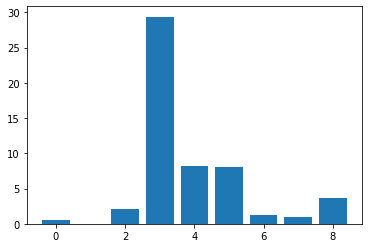

In [40]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see the scores are small and it is hard to get an idea from the number alone as to which features are more relevant.

Perhaps features 3, 4, 5, and 8 are most relevant.

A bar chart of the feature importance scores for each input feature is created.

This clearly shows that feature 3 might be the most relevant (according to chi-squared) and that perhaps four of the nine input features are the most relevant.

We could set k=4 When configuring the SelectKBest to select these top four features.

# Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the mutual_info_classif() function.

Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).

We can perform feature selection using mutual information on the breast cancer set and print and plot the scores (larger is better) as we did in the previous section.

The complete example of using mutual information for categorical feature selection is listed below.

Feature 0: 0.052337
Feature 1: 0.079476
Feature 2: 0.078859
Feature 3: 0.005010
Feature 4: 0.000000
Feature 5: 0.079874
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000


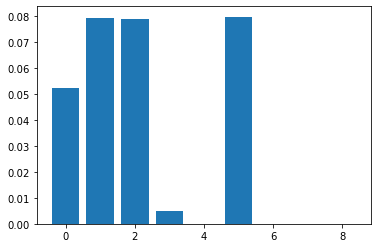

In [41]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Running the example first prints the scores calculated for each input feature and the target variable.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that some of the features have a very low score, suggesting that perhaps they can be removed.

Perhaps features 3, 6, 2, and 5 are most relevant.

A bar chart of the feature importance scores for each input feature is created.

Importantly, a different mixture of features is promoted.

Now that we know how to perform feature selection on categorical data for a classification predictive modeling problem, we can try developing a model using the selected features and compare the results


Modeling With Selected Features:-

There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use?

A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

In this section, we will evaluate a Logistic Regression model with all features compared to a model built from features selected by chi-squared and those features selected via mutual information.

Logistic regression is a good model for testing feature selection methods as it can perform better if irrelevant features are removed from the model.

Model Built Using All Features

As a first step, we will evaluate a LogisticRegression model using all the available features.

The model is fit on the training dataset and evaluated on the test dataset.

In [67]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical 
precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that the model achieves a classification accuracy of about 75%.

We would prefer to use a subset of features that achieves a classification accuracy that is as good or better than this.

Model Built Using Chi-Squared Features

We can use the chi-squared test to score the features and select the four most relevant features.

In [68]:
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


In [70]:
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs
 
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 76.84


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see a small lift in classification accuracy to 76%.

To be sure that the effect is real, it would be a good idea to repeat each experiment multiple times and compare the mean performance. It may also be a good idea to explore using k-fold cross-validation instead of a simple train/test split.

# Summary

In this tutorial, you discovered how to perform feature selection with categorical input data.

Specifically, you learned:

The breast cancer predictive modeling problem with categorical inputs and binary classification target variable.

How to evaluate the importance of categorical features using the chi-squared and mutual information statistics.

How to perform feature selection for categorical data when fitting and evaluating a classification model.